In [41]:
# 선형 회귀 모델을 정규방정식을 통해 도출하기 
# Linear Regression model via 'Normal Equation'

import numpy as np 

X = np.array([[5.0,3.4,1.5,0.2],[6.1,2.8,4.7,1.2],[6.9,3.1,5.1,2.3],[5.8,2.7,4.1,1.0]])
y = np.array([[2],[1],[3],[1]])

# Normal Equation: (X^T*X)^-1 * X^T * y
theta = np.matmul(np.matmul(np.linalg.inv(np.matmul(np.transpose(X),X)), np.transpose(X)), y)
print(theta)

# For this case, X is invertible so we can use a simplified equation: (X)^-1 * y
theta_simp = np.matmul(np.linalg.inv(X), y)
print(theta_simp)

# You can check theta & theta_simp are identical

[[ 0.04312268]
 [ 0.75390335]
 [-0.76728625]
 [ 1.86022305]]
[[ 0.04312268]
 [ 0.75390335]
 [-0.76728625]
 [ 1.86022305]]


In [42]:
!pip install scikit-learn


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [43]:
# scikit-learn 라이브러리를 활용한 회귀 모델 학습 
# Linear Regression model via 'scikit-learn'

from sklearn.linear_model import LinearRegression
import numpy as np 

# (데이터는 위와 동일함)
X = np.array([[5.0,3.4,1.5,0.2],[6.1,2.8,4.7,1.2],[6.9,3.1,5.1,2.3],[5.8,2.7,4.1,1.0]])
y = np.array([[2],[1],[3],[1]])

# generate moodel by using training set
lin_reg = LinearRegression(fit_intercept=False) # set theta_0 = 0, i.e., we will not use a bias term for linear regression. If you want to use it, erase 'fit_intercept=False' or set it to be 'True'
lin_reg.fit(X, y)   # learn the linear regression model named as 'lin_reg' by using 'fit' function in linearRegression function of sklearn. 
print(lin_reg.coef_)    # theta_1~4 for this case. The coefficients or weights are same as we obtained via numpy function.
                        # When we set 'fit-intercept=True', then the solution is not same as one obtained via numpy function
print(lin_reg.intercept_)   # intercept means a bias term in linear algebra(theta_0 in our note)


[[ 0.04312268  0.75390335 -0.76728625  1.86022305]]
0.0


# 데이터 불러와서 살펴보기 

In [44]:
import pandas as pd

path = '.\\data\\week2\\housing.csv'
housing = pd.read_csv(path)
housing.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


# 데이터 시각화: 데이터를 표현하고 살펴보기

In [45]:
import matplotlib
import matplotlib.pyplot as plt

col_list = list(housing)
print(col_list)

['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity']


In [46]:
col_list.remove('ocean_proximity')  # 리스트 내에 'ocean_proximity'를 제거한다. 
print(col_list)

['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']


col: longitude


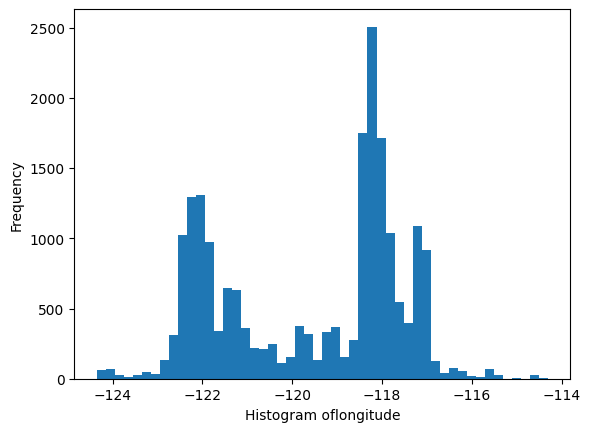

col: latitude


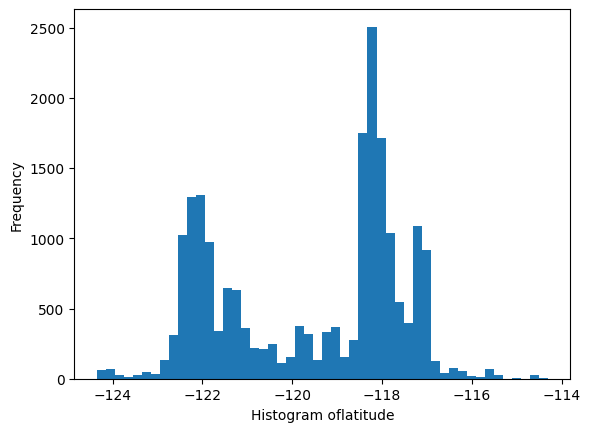

col: housing_median_age


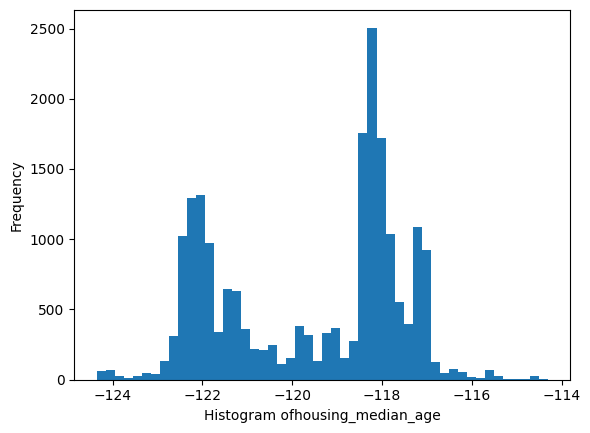

col: total_rooms


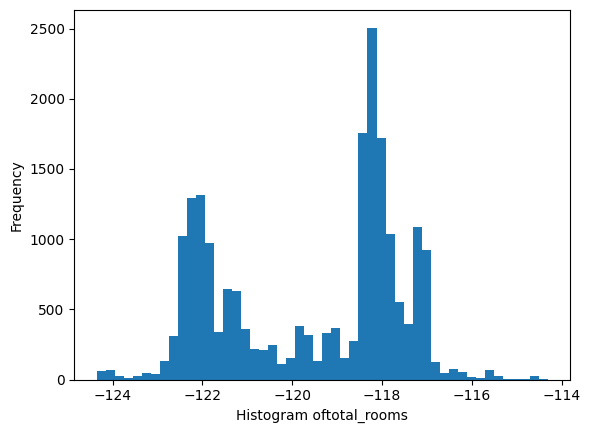

col: total_bedrooms


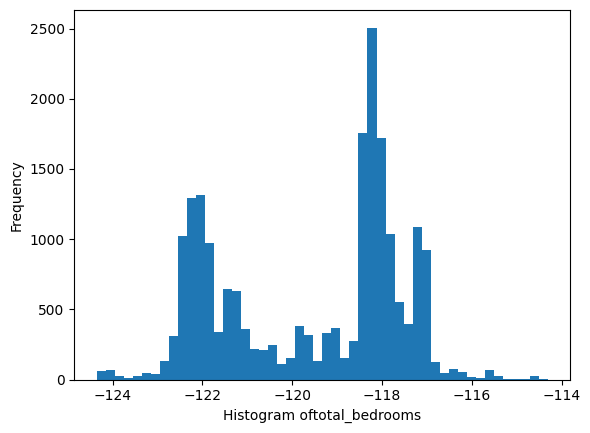

col: population


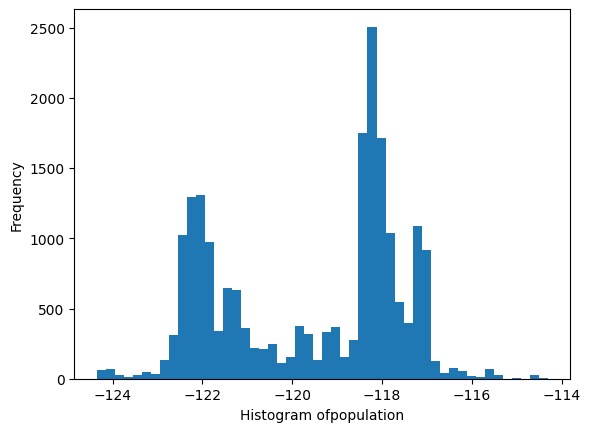

col: households


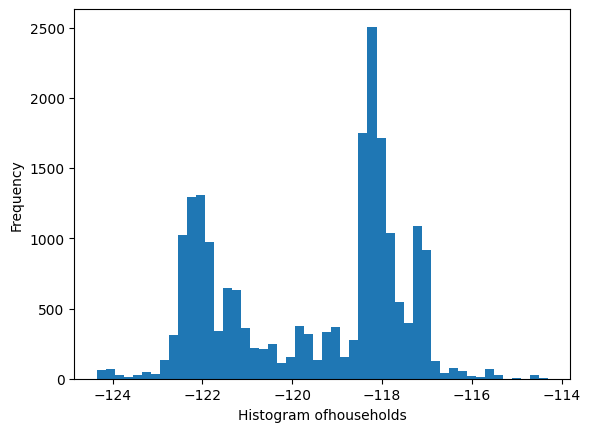

col: median_income


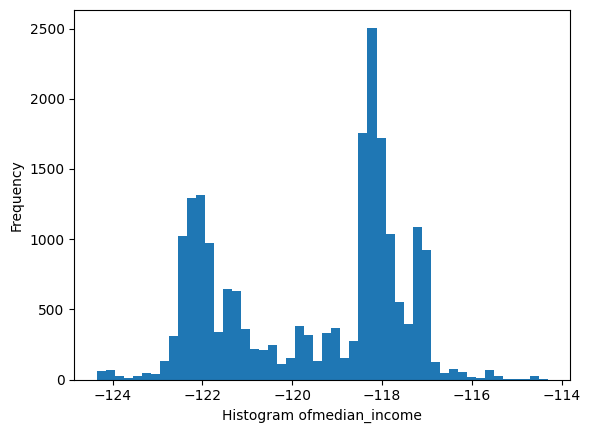

col: median_house_value


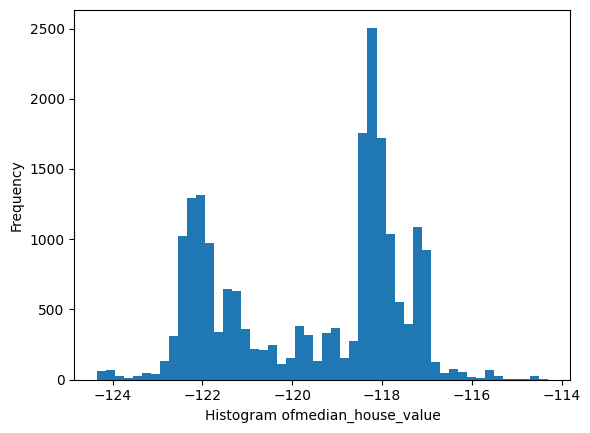

In [47]:
bins = 50

for col in col_list: 
    print('col: ' + col)
    hist = plt.hist(housing['longitude'], bins=bins)
    plt.xlabel('Histogram of' + col)
    plt.ylabel('Frequency')
    plt.show()

<AxesSubplot: xlabel='longitude', ylabel='latitude'>

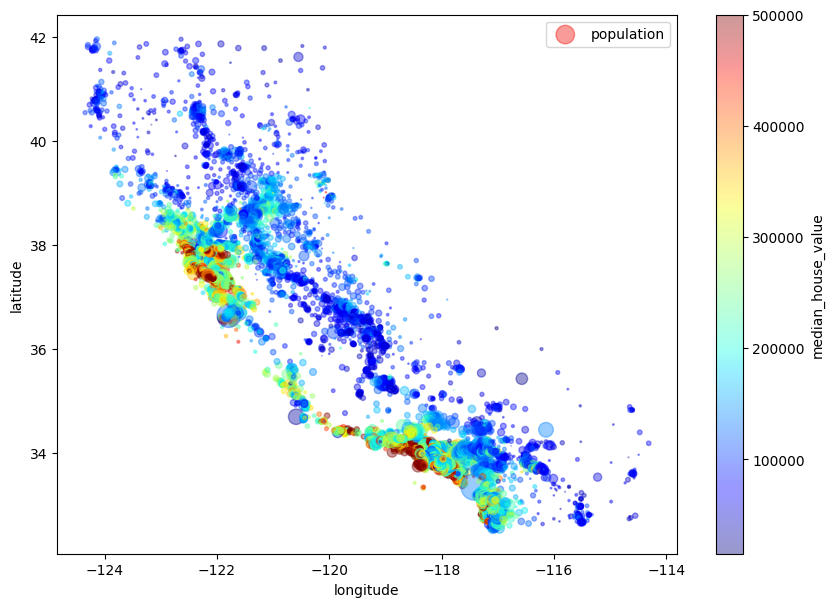

In [48]:
# housing.plot(kind='scatter', x='longtitude', y='latitude', alpha = 0.4, s = housing['population']/50, label='population', figsize=(10, 7), 
#              c = 'median_house_value', cmap=plt.get_cmap('jet'), colorbar = True)

# unhashable type: 'LinearSegmentedColormap'
# https://stackoverflow.com/questions/74208216/matplotlib-linearsegmentedcolormap-error

housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, s=housing["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap="jet", colorbar=True, sharex=False)

# 각 데이터가 가지고 있는 정보 사이의 관계 살펴보기

<AxesSubplot: xlabel='median_income', ylabel='median_house_value'>

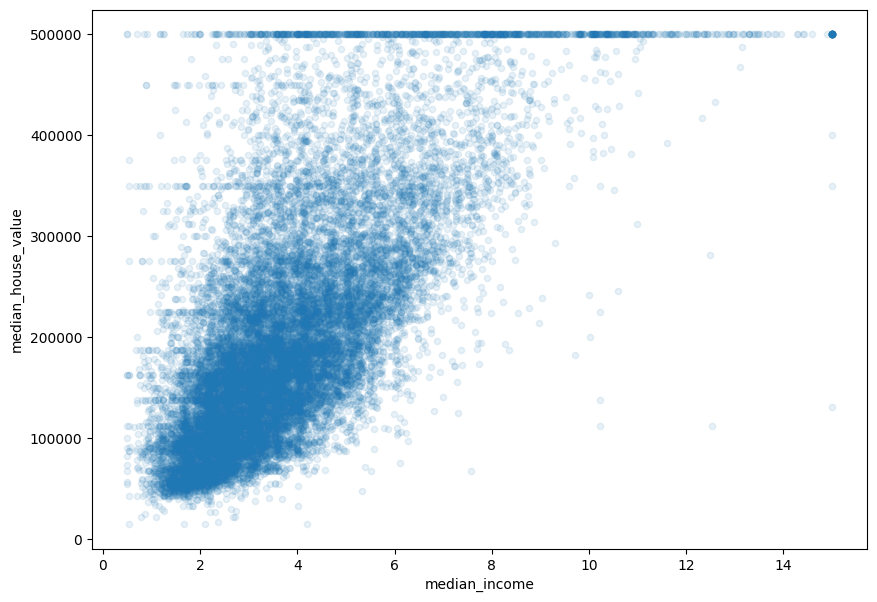

In [49]:
# median income과 median house value 사이의 관계를 scatter plot으로 확인하기 
housing.plot(kind='scatter', x = 'median_income', y = 'median_house_value', alpha = 0.1, figsize=(10,7))

# median_house_value 정보가 다른 정보와 얼마나 연관이 큰지 출력

In [50]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

C:\Temp\ipykernel_55096\2905470689.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

# 학습 데이터 전처리 
정보 중 total_bedrooms 컬럼에는 정보가 없는 데이터도 존재한다. 
따라서, total_bedrooms 에 정보가 비어있는 데이터는 median 값으로 채우고자 한다. 

In [51]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [52]:
median = housing['total_bedrooms'].median()
housing['total_bedrooms'] = housing['total_bedrooms'].fillna(median)
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


앞에서 total_rooms 와 total_bedrooms 그리고 household가 서로 간에 연관이 매우 큰 것을 확인했다. 

학습을 위해서 더 의미있는 데이터로 가공할 필요가 있고, 

- 이를 위해서 total_room은 'rooms_per_household'로 바꾸고 
- total_bedrooms는 'bedrooms_per_household'로 바꾸겠다. 

In [53]:
housing['rooms_per_household'] = housing['total_rooms'] / housing['households']
del housing['total_rooms']
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   longitude            20640 non-null  float64
 1   latitude             20640 non-null  float64
 2   housing_median_age   20640 non-null  float64
 3   total_bedrooms       20640 non-null  float64
 4   population           20640 non-null  float64
 5   households           20640 non-null  float64
 6   median_income        20640 non-null  float64
 7   median_house_value   20640 non-null  float64
 8   ocean_proximity      20640 non-null  object 
 9   rooms_per_household  20640 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


학습 데이터의 컬럼 값들을 적절한 크기의 값으로 정규화해준다. 

In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

col_list = list(housing) 
col_list.remove("ocean_proximity") # text type
col_list.remove("median_house_value") # target variable needs not to be scaled

# generate a new dataframe that consist of numeric type only
housing_numeric = housing[col_list]
housing_scaled = scaler.fit_transform(housing_numeric)
# Data type conversion from 'Series' to 'DataFrame'
housing_scaled_df = pd.DataFrame(housing_scaled, index=housing_numeric.index, columns=housing_numeric.columns)

# Concatenate 
housing = pd.concat([housing_scaled_df, housing["median_house_value"], housing["ocean_proximity"]], axis=1)
housing.head()

,longitude,latitude,housing_median_age,total_bedrooms,population,households,median_income,rooms_per_household,median_house_value,ocean_proximity
0,-1.327835,1.052548,0.982143,-0.972476,-0.974429,-0.977033,2.344766,0.628559,452600.0,NEAR BAY
1,-1.322844,1.043185,-0.607019,1.357143,0.861439,1.669961,2.332238,0.327041,358500.0,NEAR BAY
2,-1.332827,1.038503,1.856182,-0.827024,-0.820777,-0.843637,1.782699,1.155620,352100.0,NEAR BAY
3,-1.337818,1.038503,1.856182,-0.719723,-0.766028,-0.733781,0.932968,0.156966,341300.0,NEAR BAY
4,-1.337818,1.038503,1.856182,-0.612423,-0.759847,-0.629157,-0.012881,0.344711,342200.0,NEAR BAY


텍스트로 이루어진 'ocean_proximity' 값을 숫자로 변형해준다. 

그렇지 않으면, could not convert string to float: 'INLAND' 과 같은 오류 메시지를 받을 수 있다. 

In [55]:
# One-hot encoding
housing = pd.get_dummies(housing)
housing.head(10)

,longitude,latitude,housing_median_age,total_bedrooms,population,households,median_income,rooms_per_household,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-1.327835,1.052548,0.982143,-0.972476,-0.974429,-0.977033,2.344766,0.628559,452600.0,0,0,0,1,0
1,-1.322844,1.043185,-0.607019,1.357143,0.861439,1.669961,2.332238,0.327041,358500.0,0,0,0,1,0
2,-1.332827,1.038503,1.856182,-0.827024,-0.820777,-0.843637,1.782699,1.155620,352100.0,0,0,0,1,0
3,-1.337818,1.038503,1.856182,-0.719723,-0.766028,-0.733781,0.932968,0.156966,341300.0,0,0,0,1,0
4,-1.337818,1.038503,1.856182,-0.612423,-0.759847,-0.629157,-0.012881,0.344711,342200.0,0,0,0,1,0
5,-1.337818,1.038503,1.856182,-0.772182,-0.894071,-0.801787,0.087447,-0.269730,269700.0,0,0,0,1,0
6,-1.337818,1.033821,1.856182,-0.114070,-0.292712,0.037823,-0.111366,-0.200918,299200.0,0,0,0,1,0
7,-1.337818,1.033821,1.856182,0.358054,-0.237079,0.385698,-0.395137,-0.255232,241400.0,0,0,0,1,0
8,-1.342809,1.033821,1.061601,0.305595,-0.193810,0.249687,-0.942359,-0.458703,226700.0,0,0,0,1,0
9,-1.337818,1.033821,1.856182,0.405743,0.110844,0.560944,-0.094470,-0.185283,261100.0,0,0,0,1,0


# 전체 데이터를 train/test 데이터로 나누고, feature/target 정보로 나누기 

In [56]:
# training - test seperation 
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=45)

print('# of train_set: %.0f, # of test_set: %.0f' % (train_set.shape[0], test_set.shape[0]))

# of train_set: 16512, # of test_set: 4128


In [57]:
# feature and label seperation of training set
train_set_features = train_set.drop('median_house_value',  axis = 1)
train_set_target = train_set['median_house_value'].copy()

# 선형회귀 모델 학습 

In [58]:
# Part 1-1: Build Linear Regression Model by utilizing scikit-learn built-in fuctnion "LinearRegression"
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# generate model by using training set
lin_reg = LinearRegression()
lin_reg.fit(train_set_features,train_set_target)
print("Learned Parameters : ")
print(lin_reg.coef_)                        # Printing the learned weights of linear regression model
print(lin_reg.intercept_)                   # Printing the bias (intercept) of linear regression model

print("Train_score : ", lin_reg.score(train_set_features,train_set_target))

# Feature and target value Seperation of the test set
test_set_features = test_set.drop("median_house_value",axis=1)                  # drop 'median_house_value" from test_set
test_set_target = test_set["median_house_value"].copy()                    # only containing 'median_house_value" from test_set

# target value predicted from our model
final_model = lin_reg
final_predictions = final_model.predict(test_set_features)

print("Test_score : ", r2_score(test_set_target,final_predictions))

delta = test_set_target - final_predictions
print("Errors in housing value prediction : ", np.mean(np.abs(delta)/test_set_target))

# RMSE
final_mse = mean_squared_error(test_set_target, final_predictions)
final_rmse = np.sqrt(final_mse)
print("RMSE is : ", final_rmse) # Square root of the Sumg of Squared Errors

Learned Parameters : 
[-56932.50119198 -58533.9198682   13334.47873275  17289.71173966
 -53839.99280983  40779.64657197  69334.50984294   3518.51930068
 -24966.06327959 -66834.37094183 144708.08964421 -30577.7582948
 -22329.89712799]
245284.72238058603
Train_score :  0.6493164747689228
Test_score :  0.6266500717522312
Errors in housing value prediction :  0.29073582242194335
RMSE is :  70385.29582882904


In [59]:
# Part 1-2: Predict the median_house_value for given test samples:
print(test_set_features.iloc[2])
print(test_set_features.iloc[43])

# Do not use 'predict' function. Utilize matrix multiplication: prediction = weights * features + intercept
x1 = np.array(test_set_features.iloc[2])              # take the given input as a numpy array
x2 = np.array(test_set_features.iloc[43])             # take the given input as a numpy array
prediction1 = np.dot(lin_reg.coef_,x1) + lin_reg.intercept_              # Just write the code corresponds to " = weights * features + intercept"
prediction2 = np.dot(lin_reg.coef_,x2) + lin_reg.intercept_              # Just write the code corresponds to " = weights * features + intercept"
print(prediction1)
print(prediction2)

# The real median_house_values are:
print(test_set_target.iloc[2])
print(test_set_target.iloc[43])

longitude                     0.813436
latitude                     -0.792107
housing_median_age            0.108104
total_bedrooms               -0.548042
population                   -0.512592
households                   -0.498377
median_income                 0.336318
rooms_per_household          -0.106685
ocean_proximity_<1H OCEAN     1.000000
ocean_proximity_INLAND        0.000000
ocean_proximity_ISLAND        0.000000
ocean_proximity_NEAR BAY      0.000000
ocean_proximity_NEAR OCEAN    0.000000
Name: 10112, dtype: float64
longitude                    -0.728878
latitude                      1.642463
housing_median_age           -1.481058
total_bedrooms               -0.030614
population                   -0.132879
households                    0.029976
median_income                 0.108870
rooms_per_household           0.287740
ocean_proximity_<1H OCEAN     0.000000
ocean_proximity_INLAND        1.000000
ocean_proximity_ISLAND        0.000000
ocean_proximity_NEAR BAY      0.0000

# Ridge 회귀 모델 학습

In [60]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# ridge regression
model_ridge = Ridge(alpha = 100)                                                # alpha means the costant coefficient for regularization term         
model_ridge.fit(train_set_features, train_set_target)                           # train ridge regression with train_set_features and train_set_traget

print("Train_score : ", model_ridge.score(train_set_features,train_set_target))

# ridge RMSE
ridge_predicted = model_ridge.predict(test_set_features)
print("Test_score : ", r2_score(test_set_target,ridge_predicted))

delta = test_set_target - ridge_predicted
print("Errors in housing value prediction : ", np.mean(np.abs(delta)/test_set_target))

final_ridge_mse = mean_squared_error(test_set_target, ridge_predicted)
final_ridge_rmse = np.sqrt(final_ridge_mse)
print("final_ridge_RMSE : ", final_ridge_rmse)

# command to hide the warning box
import warnings
warnings.filterwarnings(action = 'ignore')

Train_score :  0.6484494385013442
Test_score :  0.6287807034798147
Errors in housing value prediction :  0.28852048670914354
final_ridge_RMSE :  70184.1712257724


# Lasso 회귀 모델 학습

In [61]:
from sklearn.linear_model import Lasso

# lasso regression
model_lasso = Lasso(alpha = 1000)
model_lasso.fit(train_set_features,train_set_target)

print("Train_score : ", model_lasso.score(train_set_features,train_set_target))

lasso_predicted = model_lasso.predict(test_set_features)
print("Test_score : ", r2_score(test_set_target,lasso_predicted))

delta = test_set_target - lasso_predicted
print("Errors in housing value prediction : ", np.mean(np.abs(delta)/test_set_target))

final_lasso_mse = mean_squared_error(test_set_target, lasso_predicted)
final_lasso_rmse = np.sqrt(final_lasso_mse)
print("RMSE is : ", final_lasso_rmse)

# command to hide the warning box
import warnings
warnings.filterwarnings(action = 'ignore')

Train_score :  0.643740533702254
Test_score :  0.6313623147794988
Errors in housing value prediction :  0.2854944257434781
RMSE is :  69939.70068543694


# 딥러닝 MLP 모델 학습

In [62]:
# Set hidden_layer_sizes (32), (64), (64,32), (32,54,32) max_iter=1000

from sklearn.neural_network import MLPRegressor

# MLP regressor
model_MLP = MLPRegressor(activation = 'relu', hidden_layer_sizes = (32,64,32), max_iter= 1000, solver= 'lbfgs')
model_MLP.fit(train_set_features,train_set_target)

print("Train_score : ", model_MLP.score(train_set_features,train_set_target))

MLP_predicted = model_MLP.predict(test_set_features)
print("Test_score : ", r2_score(test_set_target,MLP_predicted))

delta = test_set_target - MLP_predicted
print("Errors in housing value prediction : ", np.mean(np.abs(delta)/test_set_target))

final_MLP_mse = mean_squared_error(test_set_target, MLP_predicted)
final_MLP_rmse = np.sqrt(final_MLP_mse)
print("RMSE is : ", final_MLP_rmse)

Train_score :  0.8374206093600035
Test_score :  0.7890507501645853
Errors in housing value prediction :  0.1885030675760054
RMSE is :  52906.970827083824
